# Exercício do cap. 09

<img src='boxplot-imagem.png' width=70%>

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

In [21]:
dados = pd.read_csv('dados/aluguel_amostra.csv', sep=';')

In [3]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


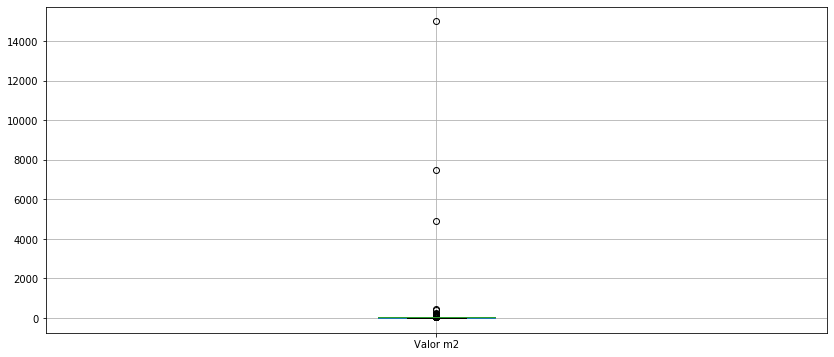

In [4]:
dados.boxplot(['Valor m2'])

In [5]:
valor_metros_quadrados = dados['Valor m2']

In [19]:
Q1 = valor_metros_quadrados.quantile(.25)
Q3 = valor_metros_quadrados.quantile(.75)
IIQ = (Q3 - Q1).round(2)
limite_inferior = (Q1 - 1.5 * IIQ).round(2)
limite_superior = (Q3 + 1.5 * IIQ).round(2)

print('''[Q1] -> {} 
       \n[Q3] -> {} 
       \n[IIQ] -> {} 
       \n[limite_inferior] -> {}
       \n[limite_superior] -> {}'''.format(Q1, Q3, IIQ, limite_inferior,limite_superior))


[Q1] -> 21.25 
       
[Q3] -> 42.31 
       
[IIQ] -> 21.06 
       
[limite_inferior] -> -10.34
       
[limite_superior] -> 73.9


## Exercício 02 do cap 09

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

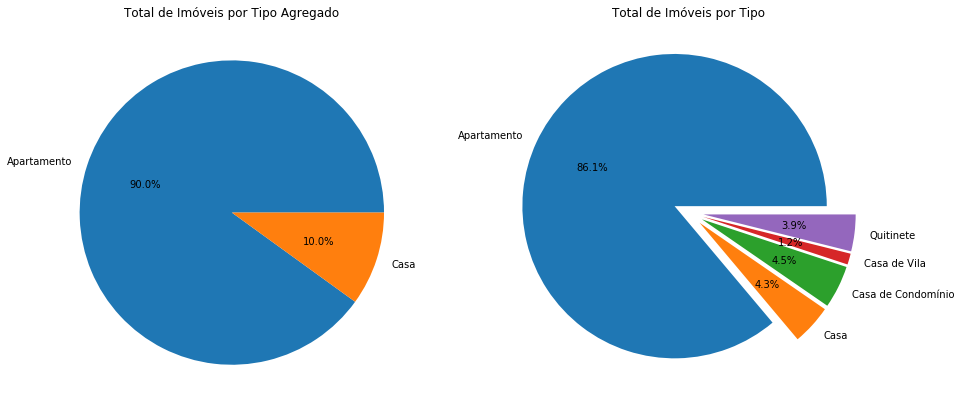

In [22]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')